In [1]:
using IJulia
using Plots

# Birthday-Paradoxon

## Methode 1: Geschlossene Formel

$$ 1 - \frac{\binom{N}{n}}{N^n} $$

## Methode 2: Rekursive Formel
$$E_n = \text{es existiert eine Kollision unter Personen 1,...,n}$$
$$E_2 = 1/N$$
$$E_n \subset E_{n+1}$$

für $2 \leq n \leq N$
$$P[E_{n+1}] = P[E_{n+1} | E_n]P[E_n] + P[E_{n+1}|\neg E_n](1-P[E_n]) $$
$$ = P[E_n] + \frac{n}{N}(1-P[E_n])$$
$$ = \frac{n}{N} + \frac{N-n}{N}P[E_n] $$


# Methode 3: Approximation der Rekursiven Formel

$$ P[\neg E_{n+1}] = \frac{N-n}{N} - \frac{N-n}{N}P[E_n] = (1-\frac{n}{N})P[\neg E_n] $$

$$ \implies P[\neg E_{n}] = \prod_{k=1}^{n-1} (1-\frac{k}{N}) \approx \prod_{k=1}^{n-1} e^{-k/N} = e^{-\sum_{k=1}^{n-1} k / N} \approx e^{-\mathcal{O}(n^2)/N}$$

In [2]:
birthday = function(n, N)
    if n < 2
        0
    elseif n == 2
        1/N
    elseif n > N
        1
    else
        (n-1)/N + (N-n+1)/N*birthday(n-1,N)
    end
end

# birthday(n,N) == 1 - binomial(BigInt(N),n)*factorial(BigInt(n))/(BigInt(N)^n) 

approx = function(n, N)
    1-exp(-n^2/(2*N))
end

#5 (generic function with 1 method)

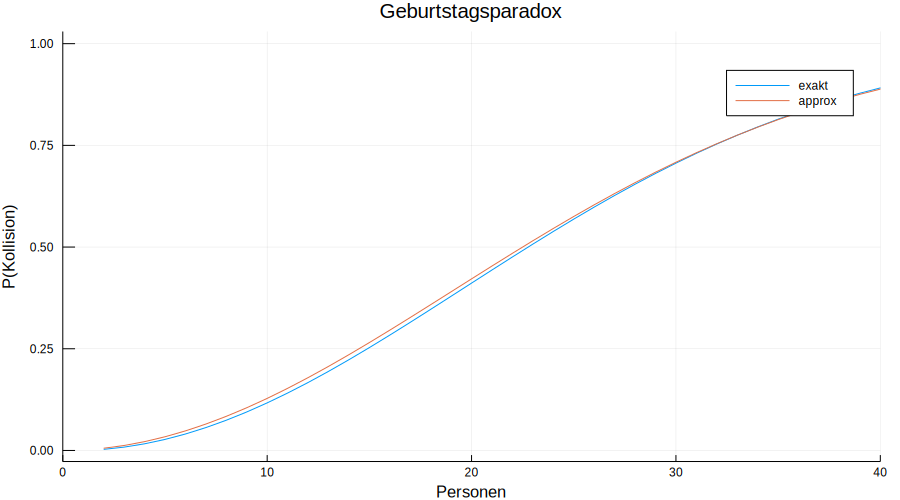

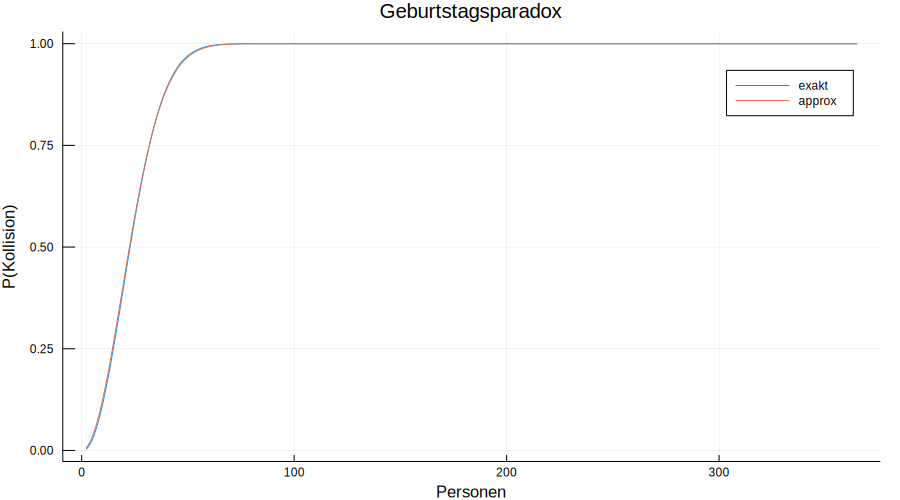

In [9]:
N = 365
xs = 2:N
methode2 = [birthday(n, N) for n in xs]
methode3 = [approx(n, N) for n in xs]

display(plot([xs,xs],[methode2,methode3],xlim=(0,40),label=["exakt", "approx"],
        ylab="P(Kollision)", xlab="Personen", size=(900,500),
        title="Geburtstagsparadox"))
display(plot([xs,xs],[methode2,methode3], label=["exakt","approx"],
        ylab="P(Kollision)", xlab="Personen", size=(900,500),
        title="Geburtstagsparadox"))